<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-linear-regression?scriptVersionId=134824636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Performing Linear Regression Modeling To Improve LMS Contents at Codecademy Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/25/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This notebook goes through what I have learned regarding to Linear Regression topics and how these tools can be use to improve the learner's experiences at Codecademy using the Codecademy's dataset through the training course.  

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Vision and Goals for This Project](#2.-Vision-and-Goals-for-This-Project)
3. [Load, Extract, and Transform Data As Needed (ETL)](#3.-Load,-Extract,-and-Transform-Data-As-Needed-(ETL))
4. [Data Exploration of the Dataset](#4.-Data-Exploration-of-the-Dataset)
5. [Summary](#Summary)

## 1. Introduction ##

This section goes through the process of importing required Python libraries to support the project in this notebook. 

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2. Vision and Goals for This Project ## 

This section goes over the vision and the goals needed to accomplish the tasks in this notebook to successfully make predictions using Linear Regression model to improve the students' experience at Codecademy. 

**Vision:** To provide insights into the Codecademy's dataset and predict the best ways to improve students' LMS experiences at Codecademy. 

**Goals:**
1. Review the raw Codecademy's dataset about the students' completed exams with the associated lessons taken (if any). 
2. Perform proper Extraction, Transformation of table and Load the dataset for staging and cleaning of the dataset further before the EDA phase (ETL). 
3. Down sample the dataset (for statistical inference) for ease of analyzing the data using the Linear Regression modeling methods to understand the why the data is the way it is and the best way to improve students' learning experiences. 
4. Create the necessary visual representations in form of plots and graphs for stakeholders and or future employers. 

## 3. Load, Extract, and Transform Data As Needed (ETL) ##

This section is about loading, extracting, and transformation of the dataset as needed to make the analysis more at ease (ETL). 

1. Load the small dataset from the Codecademy training course into this notebook. 

In [2]:
codecademy = pd.read_csv('/kaggle/input/exam-results-from-codecademy/codecademy_exam_results.csv')

2. Review the first five rows of the exam results from the dataset. 

In [3]:
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


**Specifications of the Columns:** 
1. **score** - Student score on the quix. 
2. **completed** - The number of other content items on Codecademy that the student completed prior to the quiz. 
3. **lesson** - Indicates which lesson the student ook before the quiz. For example, Lesson A or Lesson B. 

3. Review the column datatypes and the summary. 

In [5]:
codecademy.dtypes

score        float64
completed    float64
lesson        object
dtype: object

Both **score and completed** columns are floats datatype while the **lesson** column is a string datatype. 

## 4. Data Exploration of the Dataset ##

This section goes over the data exploration process to understand the differences between scores of the students' quizzes, completed LMS modules and which lesson was taken before the quiz. 

1. Model the relationship between the completed quiz scores and the number of completed LMS modules using a scatter plot with proper labeling. 

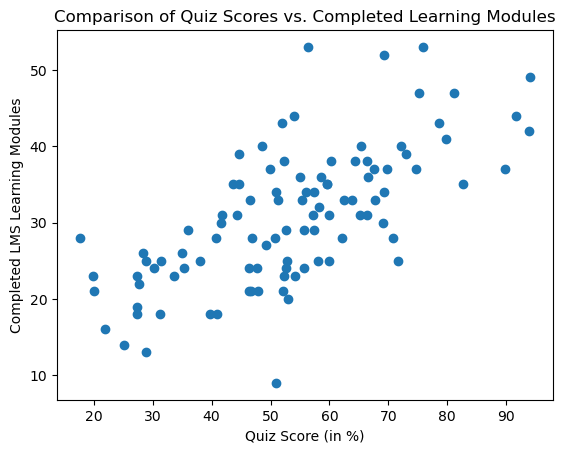

<Figure size 640x480 with 0 Axes>

In [8]:
#Plot the dataset into a scatter plot to compare the quiz scores to the completed learning modules completed before the students completed the quizzes. 
plt.scatter(codecademy.score, codecademy.completed)
plt.title('Comparison of Quiz Scores vs. Completed Learning Modules')
plt.xlabel('Quiz Score (in %)')
plt.ylabel('Completed LMS Learning Modules')

#Show then clear plot
plt.show()
plt.clf()

2. Create and fit a linear regression model to predict the students' quiz **score** using the column **completed** modules as the **predictor**. Print out the regression coefficients (params) as well. 

In [9]:
#Create a linear regression model that compares the score to the completed learning modules as the predictor. 
model = sm.OLS.from_formula('score ~ completed', data = codecademy) 

#Fit the linear regression model. 
results = model.fit()

#Printout below the information about the regression coefficients. 
print(results.params)

Intercept    13.214113
completed     1.306826
dtype: float64


**Regression Coefficients**
* **Intercept:** 13.21 - The intercept is the expected value of the outcome variable when the predictor variable is equal to zero.
* **completed:** 1.30 -  The slope is the expected difference in the outcome variable for a one unit increase in the predictor variable.

3. Make a scatter plot with score being on the **y-axis** and the completed being on the **x-axis** with the linear regression line drawn through the plot. 

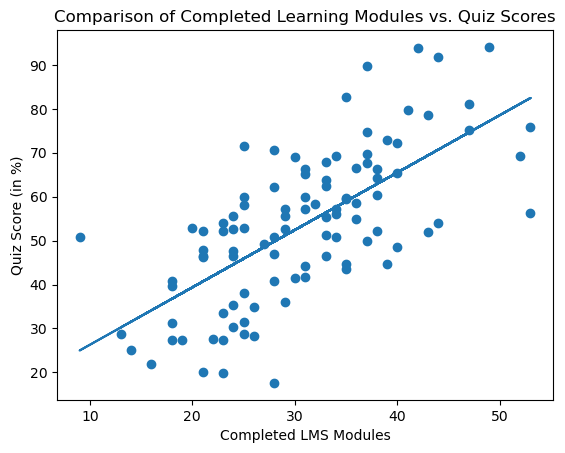

<Figure size 640x480 with 0 Axes>

In [12]:
#Plot the dataset into a scatter plot to comparing the completed learning modules to the scores of the students' quizzes. 
plt.scatter(codecademy.completed, codecademy.score)
plt.title('Comparison of Completed Learning Modules vs. Quiz Scores')
plt.plot(codecademy.completed, results.predict(codecademy))
plt.xlabel('Completed LMS Modules')
plt.ylabel('Quiz Score (in %)')

#Show then clear plot
plt.show()
plt.clf()

Based on the new scatter plot with the linear regression line through it, the line fits well with the data presented. 

4. Use the linear regression model to calculate the predicted quiz score for a student that previously completed 20 learning contents. 

In [19]:
#Input 20 completed learning modules completed by a student and save it as newdata variable. 
newdata = {'completed':[20]}

#Fit the newdata variable using the .fit() function and save it as fitted_values. 
fitted_values = results.predict(codecademy)

#Print out the predicted value of the student completing 20 learning contents. 
print(f"The predicted score for a student that successfully completed 20 learning modules is {fitted_values}%.")

The predicted score for a student that successfully completed 20 learning modules is 0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64%.


5. Calculate the residuals (differences between the actual score to the linear score) for the model and save the result as residuals. 

In [20]:
#Create a variable called residuals to find the differences between the actual score to the predicted scores (fitted_values). 
residuals = codecademy.score - fitted_values

#Print the results below. 
print(residuals)

0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64


6. Let's check to see if the residuals between the actual score to the fitted scores (predicted) are normally distributed as a bell curve. 

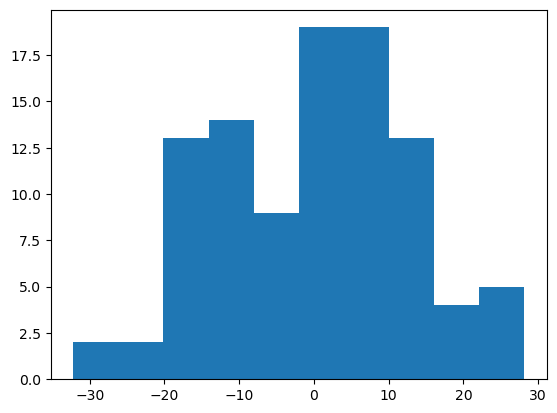

<Figure size 640x480 with 0 Axes>

In [21]:
plt.hist(residuals)
plt.show()
plt.clf()

The above shows that the residuals were normally distributed properly without showing any left or right skews. 

7. Check the homoscedasticity assumption (the residuals having constant variance at every level of x values) of the residuals against the fitted values (x-axis) to see if patterns shows or if homscedasticity assumption has been met. 

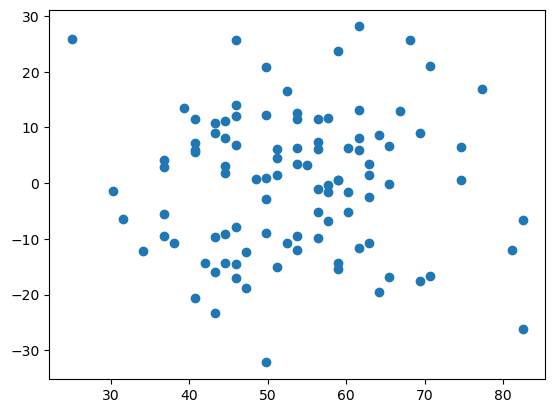

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf() #Clears the plot when done. 

Based on the homoscedasticity test, I can see that there were no patterns and the scatter dots appears on both positive y-axis and negative y-axis. **This makes the residuals trustworthy and met the homoscedasticity assumption.**

8. Use the **sns.boxplot** to create a boxplot of the **score (y-variable)** for each **lesson (x-variable)** to see the relationship between quiz score and which lesson the students completed immediately took before the quiz. 

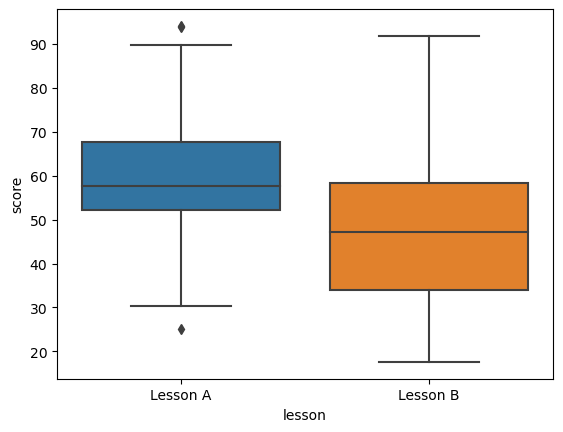

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(x = 'lesson', y = 'score', data = codecademy)
plt.show()
plt.clf()

Based on the boxplot above, **Lesson A** appears to do a better job of preparing students for the quiz than **Lesson B**.

9. Create and fit a linear regression model that predicts the **score** using the **lesson** as the predictor and print out the coefficient of the regression. 

In [25]:
#Create a model and compare the score with the predictor, lesson. 
model = sm.OLS.from_formula('score ~ lesson', data = codecademy)

#Fit the model data about the score to lesson to the results variable. 
results = model.fit()

#Print out the new regression coefficients. 
print(results.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


10. Print out the mean quiz scores for students who took lesson A and B and calculate the difference mean. 

In [28]:
print(codecademy.groupby('lesson').mean().score)

lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64


11. Use the boxplot to plot the **score** vs. **completed** colored by **lesson**.

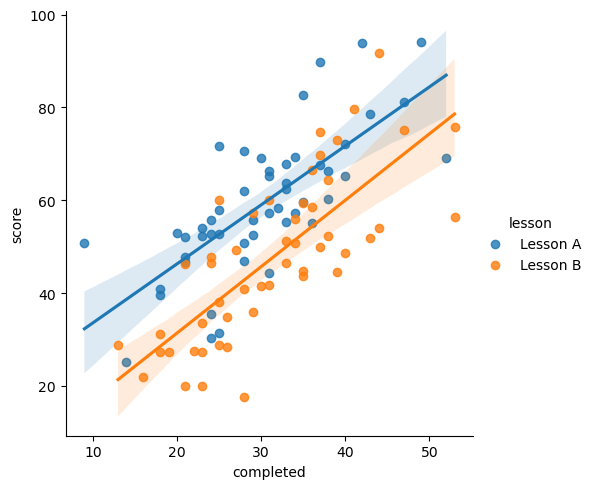

In [29]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()

The Seaborn's lmplot shows the comparison between the Lesson A and Lesson B and which lesson produces scores that were higher than Lesson B in terms of effectiveness. 

## Summary ##

This notebook went through the step by step process of loading the dataset to plotting the scores, lesson, completed variables to make sense of which lesson tends to improve the likely chances of students scoring higher than the other lesson and various aspects of the Codecademy dataset. 